<a href="https://colab.research.google.com/github/birhanumoges/jop.py/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
data = pd.read_csv("dirty_cafe_sales.csv")


Saving dirty_cafe_sales.csv to dirty_cafe_sales.csv


In [ ]:
m = data["Item"].mode()
print(m)

0    Juice
Name: Item, dtype: object


In [ ]:
data.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [ ]:
print(data.isnull().sum())

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [ ]:
#Numeric Columns: Convert Quantity, Price Per Unit, and Total Spent to numeric types:
data[['Quantity', 'Price Per Unit', 'Total Spent']] = data[['Quantity', 'Price Per Unit', 'Total Spent']].apply(pd.to_numeric, errors='coerce')

In [ ]:

data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], errors='coerce', format='%Y-%m-%d')


In [ ]:
#Replace "UNKNOWN" and "ERROR" with NaN for consistency:
data.replace(['UNKNOWN', 'ERROR', 'UnKNOWN'], pd.NA, inplace=True)

In [ ]:
# List of numeric columns
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

# Fill missing values with the median of each column
for col in numeric_cols:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)


<ipython-input-10-08838354e9ca>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)


In [ ]:
# List of categorical columns
categorical_cols = ['Item', 'Payment Method', 'Location']

# Fill missing values with the mode (most frequent value) of each column
for col in categorical_cols:
    mode_value = data[col].mode().iloc[0]  # Get the most frequent value
    data[col].fillna(mode_value, inplace=True)


<ipython-input-11-7ac6ded4341d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)


In [ ]:
# Categorical Data Standardization
categorical_cols = ['Item', 'Payment Method', 'Location']

for col in categorical_cols:
    data[col] = data[col].str.upper()


In [ ]:
#Check for duplicate Transaction ID:
data.drop_duplicates(subset=['Transaction ID'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [ ]:
data.shape

(10000, 8)

In [ ]:
data = data.dropna(subset=['Transaction Date'])


In [ ]:
# See how many missing values exist in each column
print(data.isnull().sum())


Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


In [ ]:
print(data.dtypes)


Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object


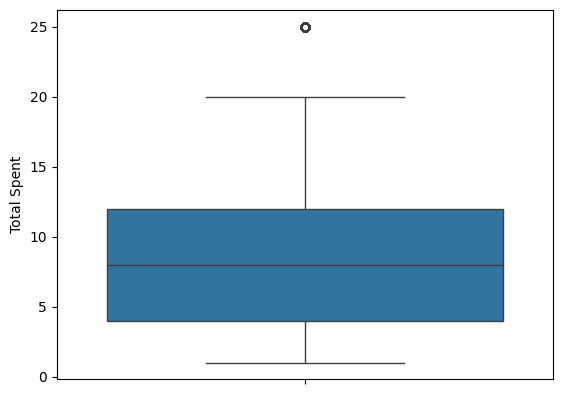

In [ ]:
#detecting outlier
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data['Total Spent'])
plt.show()


In [ ]:
import pandas as pd

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numeric column and filter out outliers using IQR
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep only the rows where the column is within bounds
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Check the cleaned dataset
print("✅ Cleaned dataset shape:", data.shape)


✅ Cleaned dataset shape: (9290, 8)


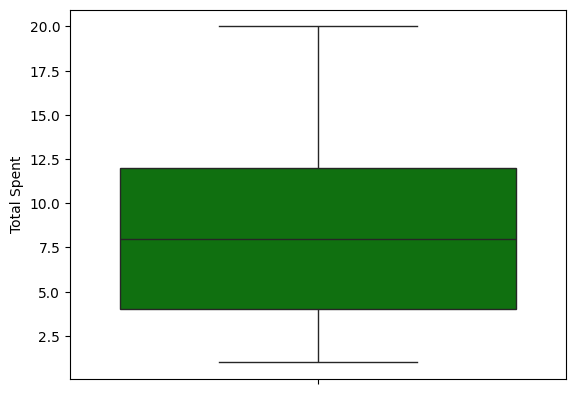

In [ ]:
#outlier allready removed
sns.boxplot(data['Total Spent'],color="green")
plt.show()

In [ ]:
outlier_info = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_info[col] = {
        'outlier_count': outliers.shape[0],
        'percent_of_data': 100 * outliers.shape[0] / data.shape[0]
    }

# Show summary
import pprint
pprint.pprint(outlier_info)


{'Price Per Unit': {'outlier_count': 0, 'percent_of_data': 0.0},
 'Quantity': {'outlier_count': 0, 'percent_of_data': 0.0},
 'Total Spent': {'outlier_count': 0, 'percent_of_data': 0.0}}


In [ ]:
cat_cols = data.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    print(f"Value counts in '{col}':")
    print(data[col].value_counts())
    print('-' * 40)


Value counts in 'Transaction ID':
Transaction ID
TXN_6170729    1
TXN_1961373    1
TXN_4977031    1
TXN_4271903    1
TXN_7034554    1
              ..
TXN_3765707    1
TXN_2847255    1
TXN_8915701    1
TXN_9437049    1
TXN_7619095    1
Name: count, Length: 9290, dtype: int64
----------------------------------------
Value counts in 'Item':
Item
JUICE       2030
COFFEE      1123
CAKE        1082
SANDWICH    1075
SMOOTHIE    1048
COOKIE      1035
TEA         1027
SALAD        870
Name: count, dtype: int64
----------------------------------------
Value counts in 'Payment Method':
Payment Method
DIGITAL WALLET    5085
CREDIT CARD       2107
CASH              2098
Name: count, dtype: int64
----------------------------------------
Value counts in 'Location':
Location
TAKEAWAY    6498
IN-STORE    2792
Name: count, dtype: int64
----------------------------------------


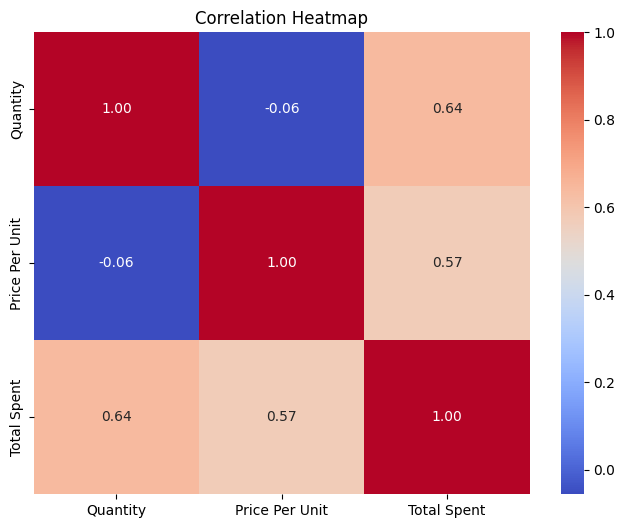

In [ ]:
"""Correlation Heatmaps – to show correlation coefficients among numeric variables"""
numeric_data = ['Quantity', 'Price Per Unit', 'Total Spent']
correlation = data[numeric_data].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

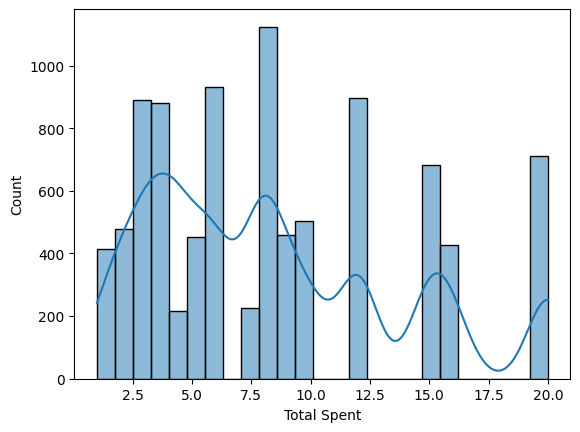

In [ ]:
sns.histplot(data['Total Spent'], kde=True)
plt.show()


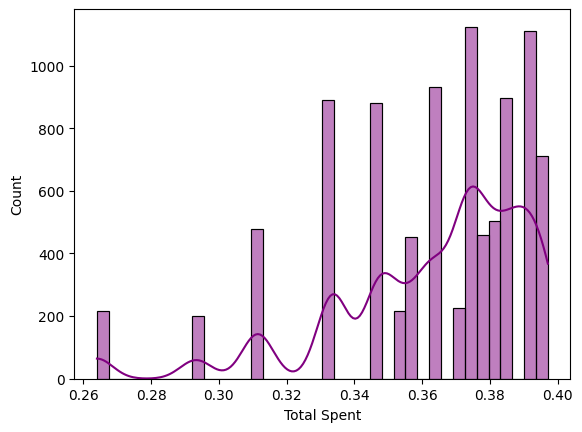

In [ ]:
import numpy as np
data['Total Spent'] = np.log1p(data['Total Spent'])
sns.histplot(data['Total Spent'], kde=True,color="purple")
plt.show()

In [ ]:
print("Unique counts for categorical variables:")
print("• Item:", data['Item'].nunique())
print("• Location:", data['Location'].nunique())
print("• Payment Method:", data['Payment Method'].nunique())


Unique counts for categorical variables:
• Item: 8
• Location: 2
• Payment Method: 3


In [ ]:
# Define the columns to clean
cat_cols = ['Item', 'Location', 'Payment Method']

# Replace rare categories (appearing less than 10 times) with "Other"
for col in cat_cols:
    counts = data[col].value_counts()
    rare_categories = counts[counts < 10].index
    data[col] = data[col].replace(rare_categories, 'Other')


In [ ]:
print("\nUpdated counts of unique categories:")
print(data['Item'].value_counts())
print(data['Location'].value_counts())
print(data['Payment Method'].value_counts())



Updated counts of unique categories:
Item
JUICE       2030
COFFEE      1123
CAKE        1082
SANDWICH    1075
SMOOTHIE    1048
COOKIE      1035
TEA         1027
SALAD        870
Name: count, dtype: int64
Location
TAKEAWAY    6498
IN-STORE    2792
Name: count, dtype: int64
Payment Method
DIGITAL WALLET    5085
CREDIT CARD       2107
CASH              2098
Name: count, dtype: int64


In [ ]:
"""Data Leakage
Why it matters: If your features include information not available at prediction time, your model will be unrealistically good and fail in production.

How to detect:

Manually inspect features. Anything from the future, or derived from the target, is leakage.

Solution:

Drop leaked columns:

# Drop the 'Revenue_after_discount' column if it's based on future data"""


if 'Revenue_after_discount' in data.columns:
    data = data.drop(columns=['Revenue_after_discount'])




In [ ]:

print("Duplicate rows:", data.duplicated().sum())


Duplicate rows: 0


In [ ]:
data = data.drop_duplicates()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9290 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9290 non-null   object        
 1   Item              9290 non-null   object        
 2   Quantity          9290 non-null   float64       
 3   Price Per Unit    9290 non-null   float64       
 4   Total Spent       9290 non-null   float64       
 5   Payment Method    9290 non-null   object        
 6   Location          9290 non-null   object        
 7   Transaction Date  9290 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 653.2+ KB


In [ ]:
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,COFFEE,2.0,2.0,0.347106,CREDIT CARD,TAKEAWAY,2023-09-08
1,TXN_4977031,CAKE,4.0,3.0,0.384837,CASH,IN-STORE,2023-05-16
2,TXN_4271903,COOKIE,4.0,1.0,0.373023,CREDIT CARD,IN-STORE,2023-07-19
3,TXN_7034554,SALAD,2.0,5.0,0.379782,DIGITAL WALLET,TAKEAWAY,2023-04-27
4,TXN_3160411,COFFEE,2.0,2.0,0.347106,DIGITAL WALLET,IN-STORE,2023-06-11


In [ ]:
# data = pd.get_dummies(data, columns=['Payment Method', 'Location', 'Item'], drop_first=True)
data = pd.get_dummies(data, columns=['Payment Method', 'Location', 'Item'], drop_first=True)


In [ ]:
#checking the VIF value
X = data.drop(columns=['Total Spent', 'Transaction ID'])
y = data['Total Spent']
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
X_const = sm.add_constant(X)  # adds a constant column of 1s for intercept
X_const_bool_fixed = X_const.copy()
# Add constant again if needed
X_const_bool_fixed = sm.add_constant(X_const_bool_fixed)

X_const_bool_fixed['Year'] = X_const_bool_fixed['Transaction Date'].dt.year
X_const_bool_fixed['Month'] = X_const_bool_fixed['Transaction Date'].dt.month
X_const_bool_fixed['day'] = X_const_bool_fixed['Transaction Date'].dt.day

X_const_bool_fixed = X_const_bool_fixed.drop(columns=['Transaction Date'])

bool_cols = X_const_bool_fixed.select_dtypes(include=['bool']).columns
X_const_bool_fixed[bool_cols] = X_const_bool_fixed[bool_cols].astype(int)

# Make sure constant is present (if not, add it)
if 'const' not in X_const_bool_fixed.columns:
    X_const_bool_fixed = add_constant(X_const_bool_fixed)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_const_bool_fixed.columns
vif_data["VIF"] = [variance_inflation_factor(X_const_bool_fixed.values, i) for i in range(X_const_bool_fixed.shape[1])]

print(vif_data[vif_data["Feature"] != "const"])

                          Feature       VIF
1                        Quantity  1.012252
2                  Price Per Unit  6.631159
3      Payment Method_CREDIT CARD  1.550827
4   Payment Method_DIGITAL WALLET  1.552536
5               Location_TAKEAWAY  1.001812
6                     Item_COFFEE  2.224255
7                     Item_COOKIE  3.316967
8                      Item_JUICE  2.251746
9                      Item_SALAD  3.002644
10                  Item_SANDWICH  2.185027
11                  Item_SMOOTHIE  2.148170
12                       Item_TEA  2.609120
13                           Year  0.000000
14                          Month  1.001552
15                            day  1.001027


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
"""Total Spent always has a correlation of 1.0 with itself.
Other values indicate how strongly each column correlates with Total Spent"""
correlation = data.corr(numeric_only=True)
print(correlation['Total Spent'].sort_values(ascending=False))


Total Spent                      1.000000
Quantity                         0.639393
Price Per Unit                   0.571115
Item_SMOOTHIE                    0.200875
Item_SANDWICH                    0.200402
Item_SALAD                       0.192312
Item_JUICE                       0.070322
Payment Method_CREDIT CARD       0.003341
Location_TAKEAWAY               -0.005869
Payment Method_DIGITAL WALLET   -0.015770
Item_COFFEE                     -0.083789
Item_TEA                        -0.221173
Item_COOKIE                     -0.463434
Name: Total Spent, dtype: float64


In [ ]:
data.head()

,Transaction ID,Quantity,Price Per Unit,Total Spent,Transaction Date,Payment Method_CREDIT CARD,Payment Method_DIGITAL WALLET,Location_TAKEAWAY,Item_COFFEE,Item_COOKIE,Item_JUICE,Item_SALAD,Item_SANDWICH,Item_SMOOTHIE,Item_TEA
0,TXN_1961373,2.0,2.0,0.347106,2023-09-08,True,False,True,True,False,False,False,False,False,False
1,TXN_4977031,4.0,3.0,0.384837,2023-05-16,False,False,False,False,False,False,False,False,False,False
2,TXN_4271903,4.0,1.0,0.373023,2023-07-19,True,False,False,False,True,False,False,False,False,False
3,TXN_7034554,2.0,5.0,0.379782,2023-04-27,False,True,True,False,False,False,True,False,False,False
4,TXN_3160411,2.0,2.0,0.347106,2023-06-11,False,True,False,True,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Total Spent', 'Transaction ID'])
y = data['Total Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Convert datetime column to datetime object (if not already)
X_train['Transaction Date'] = pd.to_datetime(X_train['Transaction Date'])
X_test['Transaction Date'] = pd.to_datetime(X_test['Transaction Date'])

# Extract useful features
for data in [X_train, X_test]:
    data['Year'] = data['Transaction Date'].dt.year
    data['Month'] = data['Transaction Date'].dt.month
    data['day'] = data['Transaction Date'].dt.day


# Drop the original datetime column
X_train = X_train.drop(columns=['Transaction Date'])
X_test = X_test.drop(columns=['Transaction Date'])


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
mse_linear=mean_squared_error(y_test, y_pred)
# Evaluate
print("MSE:",mse_linear )
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.00014261751280299537
R² Score: 0.8219373532379962


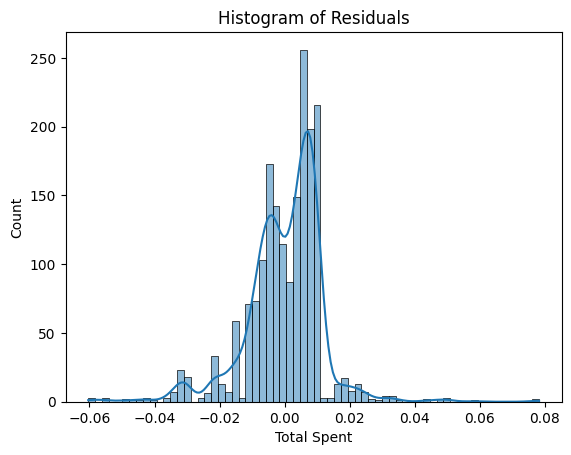

Shapiro-Wilk p-value: 6.505108367100243e-33


In [ ]:
import scipy.stats as stats
import seaborn as sns

# check normality assumption by using Histogram & # Q-Q plot
sns.histplot(y_test - y_pred, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Shapiro-Wilk test If p > 0.05, residuals are normally distributed
from scipy.stats import shapiro
stat, p = shapiro(y_test - y_pred)
print("Shapiro-Wilk p-value:", p)


In [ ]:
"""checked Independence of Errors
➡️ Close to 2 = no autocorrelation."""
from statsmodels.stats.stattools import durbin_watson

# Use y_test and y_pred which should be the same shape
residuals = y_test - y_pred  # both should be test set values
dw_score = durbin_watson(residuals)

print("Durbin-Watson score:", dw_score)



Durbin-Watson score: 2.0685044344984473


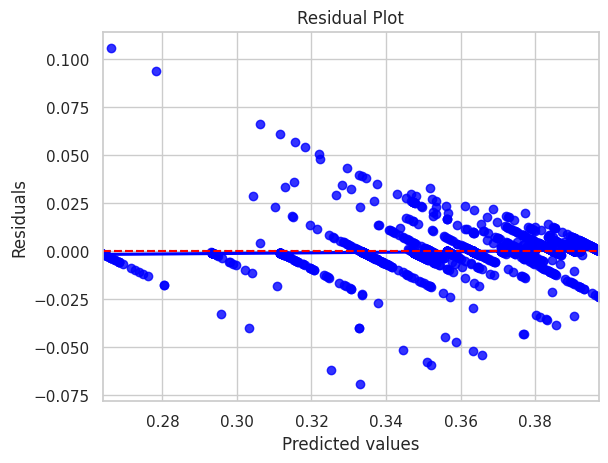

In [ ]:
"""It is used to visualize the residuals of a regression model to check for homoscedasticity and other potential issues like non-linearity or outliers."""
import seaborn as sns
import matplotlib.pyplot as plt

# Residual plot
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color='blue')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, linestyle='--', color='red')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse_randomf=mean_squared_error(y_test, y_pred)

print("MSE:",mse_randomf )
print("R² Score:", r2_score(y_test, y_pred))

MSE: 8.64024429078089e-05
R² Score: 0.892123713501304


In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

mse_tree = []
r2_tree = []

for train_index, test_index in cv.split(X):  # Example: cv is your cross-validator


    model_tree = DecisionTreeRegressor(random_state=1)
    model_tree.fit(X_train, y_train)

    y_pred_tree = model_tree.predict(X_test)  # Predict on test set

    mse_tree.append(mean_squared_error(y_test, y_pred_tree))
    r2_tree.append(r2_score(y_test, y_pred_tree))

print("Decision Tree Avg MSE:", np.mean(mse_tree))
print("Decision Tree Avg R²:", np.mean(r2_tree))


# Check which model is generally better
better_model = "Linear Regression" if np.mean(mse_linear) < np.mean(mse_tree) else "Decision Tree"
print("Better model based on average MSE:", better_model)


Decision Tree Avg MSE: 0.00016122770565665386
Decision Tree Avg R²: 0.7987019165013365
Better model based on average MSE: Linear Regression


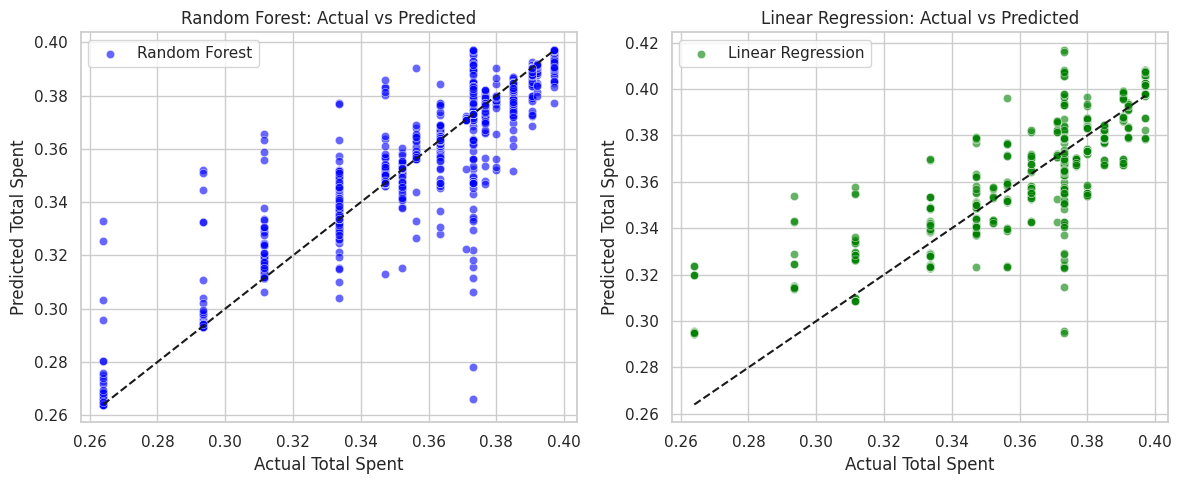

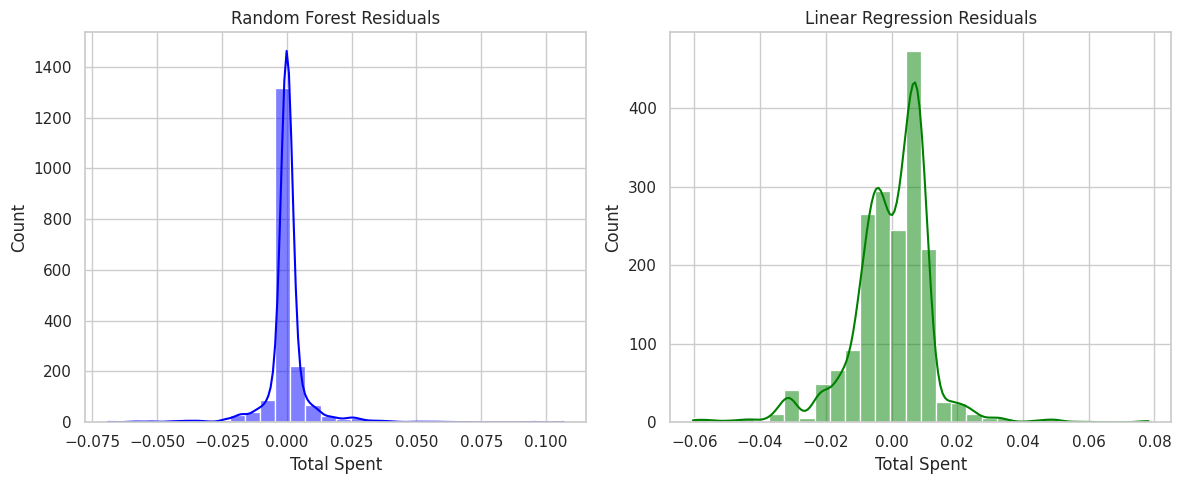

<ipython-input-52-2961980e1c84>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=metrics_df, palette='pastel')
<ipython-input-52-2961980e1c84>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=metrics_df, palette='pastel')


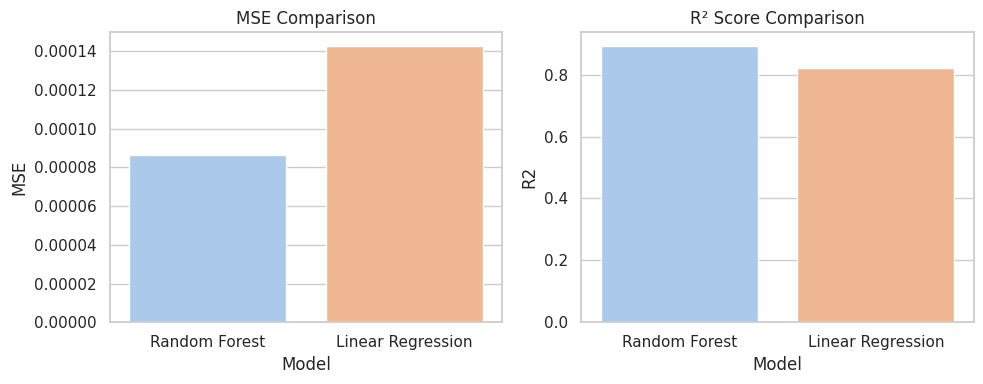

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure plots use a clean style
sns.set(style="whitegrid")

# Predict again for clarity
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# ------------------ Visualization ------------------

# 1. Actual vs Predicted
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='blue', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Total Spent')
plt.ylabel('Predicted Total Spent')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6, color='green', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Total Spent')
plt.ylabel('Predicted Total Spent')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Residuals Plot
residuals_rf = y_test - y_pred_rf
residuals_lr = y_test - y_pred_lr

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals_rf, bins=30, kde=True, color='blue')
plt.title("Random Forest Residuals")

plt.subplot(1, 2, 2)
sns.histplot(residuals_lr, bins=30, kde=True, color='green')
plt.title("Linear Regression Residuals")

plt.tight_layout()
plt.show()

# 3. Comparison of MSE and R²
metrics = {
    'Model': ['Random Forest', 'Linear Regression'],
    'MSE': [mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_lr)],
    'R2': [r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_lr)]
}

metrics_df = pd.DataFrame(metrics)

# Barplot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=metrics_df, palette='pastel')
plt.title("MSE Comparison")

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R2', data=metrics_df, palette='pastel')
plt.title("R² Score Comparison")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Create a scoring function for MSE (negative because scikit-learn minimizes loss)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# --- Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mse_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=mse_scorer)
rf_r2_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

print("Random Forest CV Results:")
print("Average MSE:", -np.mean(rf_mse_scores))  # make positive again
print("Average R²:", np.mean(rf_r2_scores))
print()

# --- Linear Regression ---
lr_model = LinearRegression()
lr_mse_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring=mse_scorer)
lr_r2_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
mse_forest=-np.mean(lr_mse_scores)
print("Linear Regression CV Results:")
print("Average MSE:",mse_forest )
print("Average R²:", np.mean(lr_r2_scores))


Random Forest CV Results:
Average MSE: 0.00010907690677430026
Average R²: 0.872241288814668

Linear Regression CV Results:
Average MSE: 0.00015827417826134557
Average R²: 0.8150487778174739


In [ ]:
mse_linear_avg = np.mean(mse_linear)
mse_tree_avg = np.mean(mse_tree)
mse_forest_avg = np.mean(mse_randomf)

model_mse = {
    "Linear Regression": mse_linear_avg,
    "Decision Tree": mse_tree_avg,
    "Random Forest": mse_forest_avg
}

print("Average MSEs:")
for model, mse in model_mse.items():
    print(f"{model}: {mse:.4f}")

better_model = min(model_mse, key=model_mse.get)
print(f"\nBetter model based on average MSE: {better_model}")



Average MSEs:
Linear Regression: 0.0001
Decision Tree: 0.0002
Random Forest: 0.0001

Better model based on average MSE: Random Forest


In [1]:
!git config --global user.email "birhanumoges726@gmail.com"
!git config --global user.name "birhanumoges"
